In [2]:
import numpy as np
%matplotlib inline
from random import Random
from texch.experiments import ClusteringExperiment, MultiClusteringExperiment
from texch.clustering.nltk import KMeansClusterer
from texch.preprocessing import PreprocessStep, Preprocessor
from texch.preprocessing.sklearn import TfidfVectorizer
from texch.clustering.nltk import KMeansClusterer

In [27]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(
    categories=[
        'alt.atheism', 'talk.religion.misc',
        'comp.graphics', 'sci.space'
    ],
    subset='test',
    random_state=42
)
labels = dataset.target
true_k = np.unique(labels).shape[0]

In [28]:
stopwords_uni =  Preprocessor(
    [TfidfVectorizer().as_preprocess_step()]
)
stopwords_bi =  Preprocessor(
    [TfidfVectorizer(ngram_range=(2, 2)).as_preprocess_step()]
)
stopwords_tri = Preprocessor(
    [TfidfVectorizer(ngram_range=(3, 3)).as_preprocess_step()]
)
stopwords_uni_bi = Preprocessor(
    [TfidfVectorizer(stop_words='english', ngram_range=(1, 2)).as_preprocess_step()]
)
stopwords_bi_tri = Preprocessor(
    [TfidfVectorizer(stop_words='english', ngram_range=(2, 3)).as_preprocess_step()]
)
stopwords_uni_bi_tri = Preprocessor(
    [TfidfVectorizer(stop_words='english', ngram_range=(1, 3)).as_preprocess_step()]
)

In [29]:
from scipy.spatial.distance import euclidean

In [46]:
experiments = [
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(10)
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(stop_words='english').as_preprocess_step()]
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='stopwords removed unigrams'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(10)
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer().as_preprocess_step()]
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='with stopwords unigrams'
    ),
     ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(10)
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(stop_words='english', ngram_range=(1,2)).as_preprocess_step()]
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='stopwords removed unigrams + bigrams'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(10)
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(ngram_range=(1,2)).as_preprocess_step()]
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='with stopwords unigrams + bigrams'
    )
]

In [31]:
stopwords_ngrams = MultiClusteringExperiment(
    data=dataset.data,
    experiments=experiments,
    verbose_name='Stopwords removed with different N-grams'
)

In [32]:
stopwords_ngrams.run()

Running multi experiment consisting of 6 sub experiments

--------------------------------------------------
*****Experiment #0*****
Running experiment "unigrams (id=18)"...
Running preprocessing...
Step #0: PreprocessStep (id=12): finished in 0.772240877151 sec
Finished preprocessing in 0.772240877151
Running in-middle prepare function...
Finished in-middle prepare function in 0.246671915054 sec
Running method...
Finished method in 12.2098829746 sec
Finished experiment in 13.2287957668 sec

--------------------------------------------------
*****Experiment #1*****
Running experiment "bigrams (id=19)"...
Running preprocessing...
Step #0: PreprocessStep (id=13): finished in 3.34141516685 sec
Finished preprocessing in 3.34141516685
Running in-middle prepare function...
Finished in-middle prepare function in 0.577143907547 sec
Running method...
Finished method in 38.8899209499 sec
Finished experiment in 42.8084800243 sec

--------------------------------------------------
*****Experiment 

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent
0,18,unigrams,0.772241,12.209883,13.228796
1,19,bigrams,3.341415,38.889921,42.808480
2,20,trigrams,2.569367,55.094876,58.202433
3,21,unigrams + bigrams,2.568008,86.491253,90.042289
4,22,bigrams + trigrams,3.062113,192.459998,196.059562
5,23,unigrams + bigrams + trigrams,3.952417,202.907462,207.441253


In [34]:
stopwords_ngrams.set_true_labels(labels)
stopwords_ngrams.compute_scores()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,18,unigrams,0.772241,12.209883,13.228796,1.312428,0.435405,0.444882,0.399010,0.454781,0.596867,0.444987,0.434026,0.561498
1,19,bigrams,3.341415,38.889921,42.808480,1.129509,0.009562,0.010485,0.002215,0.011605,0.013108,0.010534,0.007128,0.303138
2,20,trigrams,2.569367,55.094876,58.202433,0.901741,0.023336,0.028152,0.000420,0.035475,0.031989,0.028772,0.020886,0.341644
3,21,unigrams + bigrams,2.568008,86.491253,90.042289,1.282587,0.345635,0.357131,0.299086,0.369417,0.473809,0.357328,0.344037,0.495246
4,22,bigrams + trigrams,3.062113,192.459998,196.059562,1.182285,0.007724,0.008295,0.000358,0.008956,0.010589,0.008317,0.005288,0.290055
5,23,unigrams + bigrams + trigrams,3.952417,202.907462,207.441253,1.231872,0.277614,0.292436,0.224648,0.308931,0.380563,0.292854,0.275849,0.450947


In [35]:
stopwords_ngrams.compute_scores(['silhouette_coefficient', 'calinski_harabaz_score'])

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
0,18,unigrams,0.772241,12.209883,13.228796,1.312428,0.435405,0.444882,0.399010,0.454781,0.596867,0.444987,0.434026,0.561498,0.006384,7.005031
1,19,bigrams,3.341415,38.889921,42.808480,1.129509,0.009562,0.010485,0.002215,0.011605,0.013108,0.010534,0.007128,0.303138,0.001341,2.086874
2,20,trigrams,2.569367,55.094876,58.202433,0.901741,0.023336,0.028152,0.000420,0.035475,0.031989,0.028772,0.020886,0.341644,0.001135,1.937616
3,21,unigrams + bigrams,2.568008,86.491253,90.042289,1.282587,0.345635,0.357131,0.299086,0.369417,0.473809,0.357328,0.344037,0.495246,0.003739,4.603172
4,22,bigrams + trigrams,3.062113,192.459998,196.059562,1.182285,0.007724,0.008295,0.000358,0.008956,0.010589,0.008317,0.005288,0.290055,0.001203,1.917161
5,23,unigrams + bigrams + trigrams,3.952417,202.907462,207.441253,1.231872,0.277614,0.292436,0.224648,0.308931,0.380563,0.292854,0.275849,0.450947,0.002960,3.888559


In [59]:
SCORES = [
    'homogeneity', 'completeness', 'v_measure',
    'adj_rand_index', 'adjusted_mutual_info_score',
    'fowlkes_mallows_score',
    'silhouette_coefficient', 'calinski_harabaz_score'
]

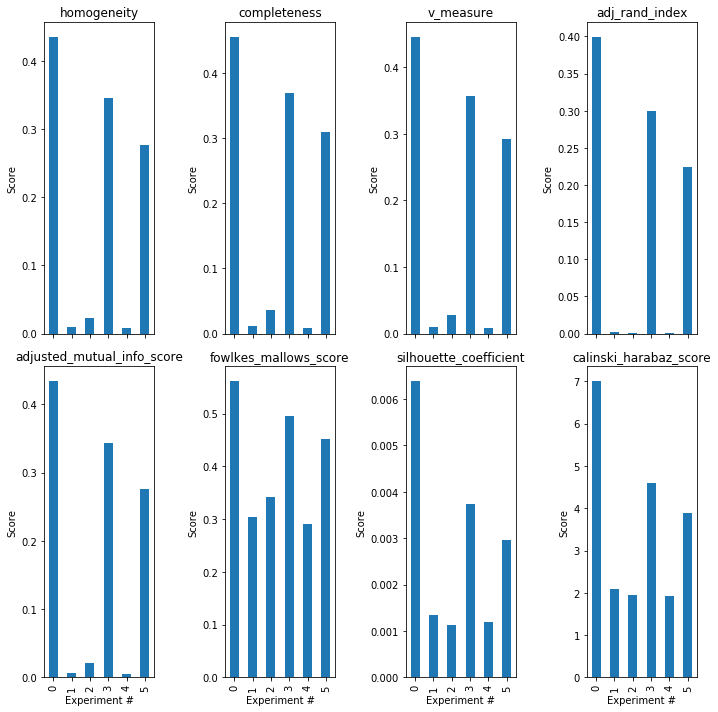

In [60]:
stopwords_ngrams.plot_scores(SCORES)

In [54]:
check_stopwords_ngrams = MultiClusteringExperiment(
    data=dataset.data,
    experiments=experiments,
    verbose_name='Stopwords removed or not with different N-grams'
)

In [55]:
check_stopwords_ngrams.run()

Running multi experiment consisting of 4 sub experiments

--------------------------------------------------
*****Experiment #0*****
Running experiment "stopwords removed unigrams (id=24)"...
Running preprocessing...
Step #0: PreprocessStep (id=18): finished in 0.77862906456 sec
Finished preprocessing in 0.77862906456
Running in-middle prepare function...
Finished in-middle prepare function in 0.151027917862 sec
Running method...
Finished method in 2.19038820267 sec
Finished experiment in 3.12004518509 sec

--------------------------------------------------
*****Experiment #1*****
Running experiment "with stopwords unigrams (id=25)"...
Running preprocessing...
Step #0: PreprocessStep (id=19): finished in 0.917279005051 sec
Finished preprocessing in 0.917279005051
Running in-middle prepare function...
Finished in-middle prepare function in 0.273751974106 sec
Running method...
Finished method in 1.73744320869 sec
Finished experiment in 2.92847418785 sec

---------------------------------

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent
0,24,stopwords removed unigrams,0.778629,2.190388,3.120045
1,25,with stopwords unigrams,0.917279,1.737443,2.928474
2,26,stopwords removed unigrams + bigrams,2.490253,11.650767,14.443236
3,27,with stopwords unigrams + bigrams,3.287194,19.491414,23.786174


In [56]:
check_stopwords_ngrams.set_true_labels(labels)
check_stopwords_ngrams.compute_scores()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,24,stopwords removed unigrams,0.778629,2.190388,3.120045,1.312428,0.435405,0.444882,0.399010,0.454781,0.596867,0.444987,0.434026,0.561498
1,25,with stopwords unigrams,0.917279,1.737443,2.928474,1.282442,0.263316,0.272088,0.239043,0.281465,0.360962,0.272239,0.261517,0.451536
2,26,stopwords removed unigrams + bigrams,2.490253,11.650767,14.443236,1.282587,0.345635,0.357131,0.299086,0.369417,0.473809,0.357328,0.344037,0.495246
3,27,with stopwords unigrams + bigrams,3.287194,19.491414,23.786174,1.199978,0.239637,0.255563,0.187564,0.273757,0.328503,0.256130,0.237778,0.430654


In [57]:
check_stopwords_ngrams.compute_scores(['silhouette_coefficient', 'calinski_harabaz_score'])

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
0,24,stopwords removed unigrams,0.778629,2.190388,3.120045,1.312428,0.435405,0.444882,0.399010,0.454781,0.596867,0.444987,0.434026,0.561498,0.006384,7.005031
1,25,with stopwords unigrams,0.917279,1.737443,2.928474,1.282442,0.263316,0.272088,0.239043,0.281465,0.360962,0.272239,0.261517,0.451536,0.001977,10.826097
2,26,stopwords removed unigrams + bigrams,2.490253,11.650767,14.443236,1.282587,0.345635,0.357131,0.299086,0.369417,0.473809,0.357328,0.344037,0.495246,0.003739,4.603172
3,27,with stopwords unigrams + bigrams,3.287194,19.491414,23.786174,1.199978,0.239637,0.255563,0.187564,0.273757,0.328503,0.256130,0.237778,0.430654,0.001818,6.714422


In [61]:
check_stopwords_ngrams.result[SCORES]

,homogeneity,completeness,v_measure,adj_rand_index,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
0,0.435405,0.454781,0.444882,0.399010,0.434026,0.561498,0.006384,7.005031
1,0.263316,0.281465,0.272088,0.239043,0.261517,0.451536,0.001977,10.826097
2,0.345635,0.369417,0.357131,0.299086,0.344037,0.495246,0.003739,4.603172
3,0.239637,0.273757,0.255563,0.187564,0.237778,0.430654,0.001818,6.714422


In [62]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
default_analyzer = TfidfVectorizer().build_analyzer()

def stem_snowball(doc):
    stemmer = SnowballStemmer('english')
    return (stemmer.stem(w) for w in default_analyzer(doc))

def stem_lancaster(doc):
    stemmer = LancasterStemmer()
    return (stemmer.stem(w) for w in default_analyzer(doc))

def lemmatizer(doc):
    lemmatizer = WordNetLemmatizer()
    return (lemmatizer.lemmatize(w) for w in default_analyzer(doc))

In [79]:
experiments = [
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(10),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                analyzer=stem_snowball,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='snowball stemmer'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(10),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                analyzer=stem_lancaster,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='lancaster stemmer'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=euclidean,
            rng=Random(10),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                analyzer=lemmatizer, 
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='lemmatizer'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=euclidean,
            rng=Random(10),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='without stem or lem'
    )
]
stem_lem_exp = MultiClusteringExperiment(
    data=dataset.data,
    experiments=experiments,
    verbose_name='Stemming and lemmatization'
)

In [80]:
stem_lem_exp.run()

Running multi experiment consisting of 4 sub experiments

--------------------------------------------------
*****Experiment #0*****
Running experiment "snowball stemmer (id=32)"...
Running preprocessing...
Step #0: PreprocessStep (id=26): finished in 11.9669880867 sec
Finished preprocessing in 11.9669880867
Running in-middle prepare function...
Finished in-middle prepare function in 0.228842020035 sec
Running method...
Finished method in 10.3189949989 sec
Finished experiment in 22.5148251057 sec

--------------------------------------------------
*****Experiment #1*****
Running experiment "lancaster stemmer (id=33)"...
Running preprocessing...
Step #0: PreprocessStep (id=27): finished in 14.3874771595 sec
Finished preprocessing in 14.3874771595
Running in-middle prepare function...
Finished in-middle prepare function in 0.19558596611 sec
Running method...
Finished method in 12.808065176 sec
Finished experiment in 27.3911283016 sec

--------------------------------------------------
**

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent
0,32,snowball stemmer,11.966988,10.318995,22.514825
1,33,lancaster stemmer,14.387477,12.808065,27.391128
2,34,lemmatizer,6.618512,14.635992,21.511810
3,35,without stem or lem,0.875319,9.197664,10.293802


In [81]:
stem_lem_exp.set_true_labels(labels)
stem_lem_exp.compute_scores()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,32,snowball stemmer,11.966988,10.318995,22.514825,1.282177,0.268607,0.277583,0.240804,0.287180,0.368215,0.277738,0.266821,0.453232
1,33,lancaster stemmer,14.387477,12.808065,27.391128,1.312402,0.312322,0.319124,0.287208,0.326228,0.428142,0.319200,0.310644,0.481822
2,34,lemmatizer,6.618512,14.635992,21.511810,1.275477,0.264760,0.274300,0.237065,0.284554,0.362942,0.274479,0.262964,0.451812
3,35,without stem or lem,0.875319,9.197664,10.293802,1.312428,0.435405,0.444882,0.399010,0.454781,0.596867,0.444987,0.434026,0.561498


In [82]:
stem_lem_exp.compute_scores(['silhouette_coefficient', 'calinski_harabaz_score'])
stem_lem_exp.result[SCORES]

,homogeneity,completeness,v_measure,adj_rand_index,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
0,0.268607,0.287180,0.277583,0.240804,0.266821,0.453232,0.001601,11.832925
1,0.312322,0.326228,0.319124,0.287208,0.310644,0.481822,-0.002438,12.946453
2,0.264760,0.284554,0.274300,0.237065,0.262964,0.451812,0.000863,11.193703
3,0.435405,0.454781,0.444882,0.399010,0.434026,0.561498,0.006384,7.005031


In [72]:
stem_lem_exp.experiments[0].preprocessed_data.shape

(1353, 20654)

In [78]:
stem_lem_exp.experiments[0].preprocessed_data.shape

(1353, 20654)

In [89]:
experiments = [
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(15)
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.5, min_df=2
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.5, min_df=2'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(15)
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.5, min_df=4
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.5, min_df=4'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(15)
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.7, min_df=2
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.7, min_df=2'
    ),
        ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(15),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.7, min_df=4
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.7, min_df=4'
    ),
        ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(15),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.7, min_df=6
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.7, min_df=6'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(15),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.9, min_df=6
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.9, min_df=6'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(15),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.9, min_df=10
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.9, min_df=10'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(15),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.7, min_df=0.1
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.7, min_df=0.1'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(15),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.7, min_df=0.05
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.7, min_df=0.05'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(15),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.7, min_df=0.01
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.7, min_df=0.01'
    ),
        ClusteringExperiment(
        method=KMeansClusterer(
            true_k,
            distance=euclidean,
            rng=Random(15),
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.8, min_df=0.005
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.8, min_df=0.005'
    ),
]
tfidf_constraints = MultiClusteringExperiment(
    data=dataset.data,
    experiments=experiments,
    verbose_name='Different df constraints'
)

In [90]:
tfidf_constraints.run()

Running multi experiment consisting of 11 sub experiments

--------------------------------------------------
*****Experiment #0*****
Running experiment "max_df=0.5, min_df=2 (id=51)"...
Running preprocessing...
Step #0: PreprocessStep (id=45): finished in 0.650729894638 sec
Finished preprocessing in 0.650729894638
Running in-middle prepare function...
Finished in-middle prepare function in 0.167391061783 sec
Running method...
Finished method in 11.6344499588 sec
Finished experiment in 12.4525709152 sec

--------------------------------------------------
*****Experiment #1*****
Running experiment "max_df=0.5, min_df=4 (id=52)"...
Running preprocessing...
Step #0: PreprocessStep (id=46): finished in 0.640695810318 sec
Finished preprocessing in 0.640695810318
Running in-middle prepare function...
Finished in-middle prepare function in 0.130686998367 sec
Running method...
Finished method in 7.24587988853 sec
Finished experiment in 8.01726269722 sec

---------------------------------------

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent
0,51,"max_df=0.5, min_df=2",0.650730,11.634450,12.452571
1,52,"max_df=0.5, min_df=4",0.640696,7.245880,8.017263
2,53,"max_df=0.7, min_df=2",0.639949,10.781481,11.519913
3,54,"max_df=0.7, min_df=4",0.623356,4.379206,5.054361
4,55,"max_df=0.7, min_df=6",0.581367,3.900728,4.523227
5,56,"max_df=0.9, min_df=6",0.548574,3.052030,3.647197
6,57,"max_df=0.9, min_df=10",0.644424,4.366964,5.049867
7,58,"max_df=0.7, min_df=0.1",0.790028,1.811147,2.605468
8,59,"max_df=0.7, min_df=0.05",0.713893,2.875665,3.592803
9,60,"max_df=0.7, min_df=0.01",0.643371,5.584993,6.252364


In [91]:
tfidf_constraints.set_true_labels(labels)
tfidf_constraints.compute_scores()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,51,"max_df=0.5, min_df=2",0.650730,11.634450,12.452571,1.341422,0.453964,0.458886,0.320744,0.463917,0.622309,0.458913,0.452631,0.500960
1,52,"max_df=0.5, min_df=4",0.640696,7.245880,8.017263,1.356228,0.513437,0.516187,0.447966,0.518966,0.703837,0.516194,0.512249,0.591984
2,53,"max_df=0.7, min_df=2",0.639949,10.781481,11.519913,1.344950,0.466276,0.470721,0.337562,0.475250,0.639188,0.470742,0.464974,0.512518
3,54,"max_df=0.7, min_df=4",0.623356,4.379206,5.054361,1.363101,0.515593,0.517051,0.438837,0.518518,0.706793,0.517054,0.514411,0.584265
4,55,"max_df=0.7, min_df=6",0.581367,3.900728,4.523227,1.369378,0.527135,0.527415,0.457742,0.527695,0.722614,0.527415,0.525981,0.597396
5,56,"max_df=0.9, min_df=6",0.548574,3.052030,3.647197,1.340179,0.464370,0.469621,0.351587,0.474992,0.636574,0.469651,0.463063,0.524046
6,57,"max_df=0.9, min_df=10",0.644424,4.366964,5.049867,1.329727,0.459944,0.466945,0.346807,0.474162,0.630506,0.466999,0.458625,0.522442
7,58,"max_df=0.7, min_df=0.1",0.790028,1.811147,2.605468,1.342582,0.232931,0.235356,0.213574,0.237832,0.319309,0.235369,0.231058,0.420720
8,59,"max_df=0.7, min_df=0.05",0.713893,2.875665,3.592803,1.298366,0.353540,0.363138,0.271594,0.373273,0.484645,0.363272,0.351961,0.471190
9,60,"max_df=0.7, min_df=0.01",0.643371,5.584993,6.252364,1.212222,0.482718,0.512359,0.433861,0.545879,0.661727,0.513328,0.481453,0.601968


In [94]:
tfidf_constraints.compute_scores(['silhouette_coefficient', 'calinski_harabaz_score'])
tfidf_constraints.result[['ExperimentName'] + SCORES]

,ExperimentName,homogeneity,completeness,v_measure,adj_rand_index,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
0,"max_df=0.5, min_df=2",0.453964,0.463917,0.458886,0.320744,0.452631,0.500960,0.008181,7.822818
1,"max_df=0.5, min_df=4",0.513437,0.518966,0.516187,0.447966,0.512249,0.591984,0.008774,8.664423
2,"max_df=0.7, min_df=2",0.466276,0.475250,0.470721,0.337562,0.464974,0.512518,0.008231,7.762902
3,"max_df=0.7, min_df=4",0.515593,0.518518,0.517051,0.438837,0.514411,0.584265,0.008722,8.570506
4,"max_df=0.7, min_df=6",0.527135,0.527695,0.527415,0.457742,0.525981,0.597396,0.009779,9.381925
5,"max_df=0.9, min_df=6",0.464370,0.474992,0.469621,0.351587,0.463063,0.524046,0.009552,9.456650
6,"max_df=0.9, min_df=10",0.459944,0.474162,0.466945,0.346807,0.458625,0.522442,0.010918,10.913705
7,"max_df=0.7, min_df=0.1",0.232931,0.237832,0.235356,0.213574,0.231058,0.420720,0.055309,53.015010
8,"max_df=0.7, min_df=0.05",0.353540,0.373273,0.363138,0.271594,0.351961,0.471190,0.027054,24.169157
9,"max_df=0.7, min_df=0.01",0.482718,0.545879,0.512359,0.433861,0.481453,0.601968,0.013793,13.565936
